In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('dataset.csv')

df=df.sample(2000) # 2000개 sampling
df=df.rename(columns={'p0317':'p_fulltime'}) # 행 이름 변경

# 결측치 제거
df[df['p_fulltime']<0]=np.NaN 
df=df.dropna(subset=['p_fulltime'],axis=0)
df

,hhid,pid,wave,year,p_age,p_edu,p_employ_type,p_ind2017,p_job_begin,p_job_status,...,p_jobtype,p_married,p_region,p_sex,p_wage,p_fulltime,p4321,p6615,pa5322,extract_date
20473,203495.0,20349501.0,25.0,2022.0,53.0,6.0,1.0,851.0,2022m7,2.0,...,1.0,1.0,1.0,2.0,25.0,2.0,3.0,4.0,NaN,2024-04-17 20:11
1989,8316.0,108404.0,25.0,2022.0,41.0,6.0,1.0,473.0,2008m4,1.0,...,1.0,2.0,1.0,2.0,250.0,1.0,3.0,4.0,NaN,2024-04-17 20:11
12513,100294.0,10029402.0,25.0,2022.0,61.0,2.0,1.0,14.0,2022m1,2.0,...,1.0,2.0,15.0,2.0,170.0,2.0,3.0,5.0,NaN,2024-04-17 20:11
18911,202524.0,20252403.0,25.0,2022.0,37.0,6.0,1.0,701.0,2013m3,1.0,...,1.0,2.0,8.0,1.0,750.0,1.0,3.0,4.0,NaN,2024-04-17 20:11
4186,2303.0,230304.0,25.0,2022.0,31.0,4.0,1.0,861.0,2021m1,1.0,...,1.0,1.0,5.0,2.0,290.0,1.0,2.0,4.0,NaN,2024-04-17 20:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,4702.0,470203.0,25.0,2022.0,32.0,6.0,1.0,241.0,2018m10,1.0,...,1.0,1.0,3.0,1.0,282.0,1.0,3.0,4.0,NaN,2024-04-17 20:11
4290,2352.0,235202.0,25.0,2022.0,60.0,5.0,1.0,471.0,2021m8,2.0,...,1.0,2.0,5.0,2.0,150.0,2.0,3.0,5.0,NaN,2024-04-17 20:11
7530,4058.0,405801.0,25.0,2022.0,70.0,2.0,1.0,682.0,2021m1,1.0,...,1.0,2.0,11.0,1.0,197.0,2.0,3.0,4.0,NaN,2024-04-17 20:11
8660,6960.0,462603.0,25.0,2022.0,44.0,6.0,1.0,872.0,2011m9,1.0,...,1.0,2.0,14.0,2.0,245.0,2.0,3.0,4.0,NaN,2024-04-17 20:11


In [4]:
# 성별에 따른 임금 평균
sex_wage=df.groupby('p_sex', as_index=False)\
           .agg(mean_wage=('p_wage','mean'))
sex_wage

,p_sex,mean_wage
0,1.0,346.419753
1,2.0,212.504298


In [5]:
sex_wage_result = df.groupby('p_sex',as_index=False).p_wage.agg(['mean', 'std','sum','median','min', 'max', 'count'])
sex_wage_result

,mean,std,sum,median,min,max,count
p_sex,,,,,,,
1.0,346.419753,205.459116,168360.0,300.0,27.0,3000.0,486
2.0,212.504298,163.022187,74164.0,200.0,20.0,2400.0,349


<AxesSubplot:>

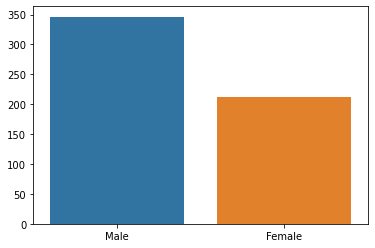

In [6]:
# mean_p_wage1=sex_wage_result['mean'][0]
mean_p_wage1 = sex_wage_result.iloc[0]['mean']

mean_p_wage1  # male 평균 임금

mean_p_wage2 = sex_wage_result.iloc[1]['mean']

mean_p_wage2 # female 평균 임금


x=['Male','Female']
y=[mean_p_wage1,mean_p_wage2] # [male_mean, female_mean] #y축 설정


sns.barplot(data=sex_wage_result, x=x, y=y) #그래프 시각화 

In [7]:
sex_wage_edu=df.groupby(['p_sex','p_edu'], as_index=False).agg(mean_wage=('p_wage','mean'))
# 성별에 따른 임금 차이 + 교란요인 교육수준 추가 
           
sex_wage_edu

,p_sex,p_edu,mean_wage
0,1.0,2.0,216.560976
1,1.0,3.0,298.934211
2,1.0,4.0,324.423077
3,1.0,5.0,332.593023
4,1.0,6.0,425.441989
5,2.0,1.0,36.500000
6,2.0,2.0,114.916667
7,2.0,3.0,187.703297
8,2.0,4.0,166.166667
9,2.0,5.0,227.671642


In [8]:
sex_wage_edu_fulltime= df.groupby(['p_sex','p_edu','p_fulltime'], as_index=False).agg(mean_wage=('p_wage','mean'))
# 성별,교육에 따른 임금 차이 + 교란요인 정규직 여부 추가 
                         
sex_wage_edu_fulltime

,p_sex,p_edu,p_fulltime,mean_wage
0,1.0,2.0,1.0,320.454545
1,1.0,2.0,2.0,178.466667
2,1.0,3.0,1.0,340.043478
3,1.0,3.0,2.0,235.900000
4,1.0,4.0,1.0,338.000000
5,1.0,4.0,2.0,161.500000
6,1.0,5.0,1.0,371.938462
7,1.0,5.0,2.0,210.809524
8,1.0,6.0,1.0,448.880503
9,1.0,6.0,2.0,256.045455


In [9]:
# 연령대 범주 설정 및 데이터 재할당

age=df.assign(age=np.where(df['p_age']<20,'10s',
                 np.where(df['p_age']<30,'20s',
                 np.where(df['p_age']<40,'30s',
                 np.where(df['p_age']<50,'40s', 
                 np.where(df['p_age']<60,'50s',
                           'more than 60s'))))))

age['age'].value_counts() 
df2=pd.concat([df,age]) # age 추가
df2= df2.dropna(subset=['age'],axis=0) #결측치 제거 
df2

,hhid,pid,wave,year,p_age,p_edu,p_employ_type,p_ind2017,p_job_begin,p_job_status,...,p_married,p_region,p_sex,p_wage,p_fulltime,p4321,p6615,pa5322,extract_date,age
20473,203495.0,20349501.0,25.0,2022.0,53.0,6.0,1.0,851.0,2022m7,2.0,...,1.0,1.0,2.0,25.0,2.0,3.0,4.0,NaN,2024-04-17 20:11,50s
1989,8316.0,108404.0,25.0,2022.0,41.0,6.0,1.0,473.0,2008m4,1.0,...,2.0,1.0,2.0,250.0,1.0,3.0,4.0,NaN,2024-04-17 20:11,40s
12513,100294.0,10029402.0,25.0,2022.0,61.0,2.0,1.0,14.0,2022m1,2.0,...,2.0,15.0,2.0,170.0,2.0,3.0,5.0,NaN,2024-04-17 20:11,more than 60s
18911,202524.0,20252403.0,25.0,2022.0,37.0,6.0,1.0,701.0,2013m3,1.0,...,2.0,8.0,1.0,750.0,1.0,3.0,4.0,NaN,2024-04-17 20:11,30s
4186,2303.0,230304.0,25.0,2022.0,31.0,4.0,1.0,861.0,2021m1,1.0,...,1.0,5.0,2.0,290.0,1.0,2.0,4.0,NaN,2024-04-17 20:11,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,4702.0,470203.0,25.0,2022.0,32.0,6.0,1.0,241.0,2018m10,1.0,...,1.0,3.0,1.0,282.0,1.0,3.0,4.0,NaN,2024-04-17 20:11,30s
4290,2352.0,235202.0,25.0,2022.0,60.0,5.0,1.0,471.0,2021m8,2.0,...,2.0,5.0,2.0,150.0,2.0,3.0,5.0,NaN,2024-04-17 20:11,more than 60s
7530,4058.0,405801.0,25.0,2022.0,70.0,2.0,1.0,682.0,2021m1,1.0,...,2.0,11.0,1.0,197.0,2.0,3.0,4.0,NaN,2024-04-17 20:11,more than 60s
8660,6960.0,462603.0,25.0,2022.0,44.0,6.0,1.0,872.0,2011m9,1.0,...,2.0,14.0,2.0,245.0,2.0,3.0,4.0,NaN,2024-04-17 20:11,40s


In [10]:
df2.head()


,hhid,pid,wave,year,p_age,p_edu,p_employ_type,p_ind2017,p_job_begin,p_job_status,...,p_married,p_region,p_sex,p_wage,p_fulltime,p4321,p6615,pa5322,extract_date,age
20473,203495.0,20349501.0,25.0,2022.0,53.0,6.0,1.0,851.0,2022m7,2.0,...,1.0,1.0,2.0,25.0,2.0,3.0,4.0,NaN,2024-04-17 20:11,50s
1989,8316.0,108404.0,25.0,2022.0,41.0,6.0,1.0,473.0,2008m4,1.0,...,2.0,1.0,2.0,250.0,1.0,3.0,4.0,NaN,2024-04-17 20:11,40s
12513,100294.0,10029402.0,25.0,2022.0,61.0,2.0,1.0,14.0,2022m1,2.0,...,2.0,15.0,2.0,170.0,2.0,3.0,5.0,NaN,2024-04-17 20:11,more than 60s
18911,202524.0,20252403.0,25.0,2022.0,37.0,6.0,1.0,701.0,2013m3,1.0,...,2.0,8.0,1.0,750.0,1.0,3.0,4.0,NaN,2024-04-17 20:11,30s
4186,2303.0,230304.0,25.0,2022.0,31.0,4.0,1.0,861.0,2021m1,1.0,...,1.0,5.0,2.0,290.0,1.0,2.0,4.0,NaN,2024-04-17 20:11,30s


In [11]:
#성별에 따른 임금 차이 + 교란요인 교육, 정규직 여부, 연령,지역,경제 수준 교육 추가

sex_wage_edu_fulltime_age_region_level= df2.groupby(['p_sex','p_edu','p_fulltime','age','p_region','p6615'], 
                                                    as_index=False).agg(mean_wage=('p_wage','mean'))
sex_wage_edu_fulltime_age_region_level

,p_sex,p_edu,p_fulltime,age,p_region,p6615,mean_wage
0,1.0,2.0,1.0,50s,1.0,5.0,280.0
1,1.0,2.0,1.0,50s,10.0,4.0,440.0
2,1.0,2.0,1.0,50s,15.0,3.0,500.0
3,1.0,2.0,1.0,more than 60s,2.0,5.0,250.0
4,1.0,2.0,1.0,more than 60s,5.0,4.0,500.0
...,...,...,...,...,...,...,...
571,2.0,6.0,2.0,50s,5.0,5.0,225.0
572,2.0,6.0,2.0,50s,8.0,4.0,175.0
573,2.0,6.0,2.0,50s,8.0,5.0,245.0
574,2.0,6.0,2.0,more than 60s,8.0,1.0,300.0


In [12]:
# 행 이름 재설정 
sex_wage_edu_fulltime_age_region_level = sex_wage_edu_fulltime_age_region_level.rename(columns={'p6615': 'p_economicLevel'}) 

sex_wage_edu_fulltime_age_region_level

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
0,1.0,2.0,1.0,50s,1.0,5.0,280.0
1,1.0,2.0,1.0,50s,10.0,4.0,440.0
2,1.0,2.0,1.0,50s,15.0,3.0,500.0
3,1.0,2.0,1.0,more than 60s,2.0,5.0,250.0
4,1.0,2.0,1.0,more than 60s,5.0,4.0,500.0
...,...,...,...,...,...,...,...
571,2.0,6.0,2.0,50s,5.0,5.0,225.0
572,2.0,6.0,2.0,50s,8.0,4.0,175.0
573,2.0,6.0,2.0,50s,8.0,5.0,245.0
574,2.0,6.0,2.0,more than 60s,8.0,1.0,300.0


In [13]:
# 1 수도권: 서울 인천 경기 
metroDf = sex_wage_edu_fulltime_age_region_level[(sex_wage_edu_fulltime_age_region_level['p_region'] == 1.0) |
                                            (sex_wage_edu_fulltime_age_region_level['p_region'] == 5.0) |
                                            (sex_wage_edu_fulltime_age_region_level['p_region'] == 8.0)].copy()

metroDf.loc[:, 'p_region'] = 1  # 수도권 1로 설정
metroDf

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
0,1.0,2.0,1.0,50s,1,5.0,280.0
4,1.0,2.0,1.0,more than 60s,1,4.0,500.0
5,1.0,2.0,1.0,more than 60s,1,5.0,245.0
7,1.0,2.0,1.0,more than 60s,1,5.0,245.0
16,1.0,2.0,2.0,more than 60s,1,3.0,171.5
...,...,...,...,...,...,...,...
569,2.0,6.0,2.0,50s,1,4.0,25.0
571,2.0,6.0,2.0,50s,1,5.0,225.0
572,2.0,6.0,2.0,50s,1,4.0,175.0
573,2.0,6.0,2.0,50s,1,5.0,245.0


In [14]:
# 2 비수도권: 나머지 
nonMetroDf = sex_wage_edu_fulltime_age_region_level[(sex_wage_edu_fulltime_age_region_level['p_region'] != 1.0) &
                                            (sex_wage_edu_fulltime_age_region_level['p_region'] != 5.0) &
                                            (sex_wage_edu_fulltime_age_region_level['p_region'] != 8.0)].copy()
nonMetroDf.loc[:,'p_region']=2 # 비수도권 2로 설정 

nonMetroDf

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
1,1.0,2.0,1.0,50s,2,4.0,440.0
2,1.0,2.0,1.0,50s,2,3.0,500.0
3,1.0,2.0,1.0,more than 60s,2,5.0,250.0
6,1.0,2.0,1.0,more than 60s,2,4.0,230.0
8,1.0,2.0,1.0,more than 60s,2,4.0,340.0
...,...,...,...,...,...,...,...
564,2.0,6.0,2.0,30s,2,4.0,108.0
566,2.0,6.0,2.0,40s,2,3.0,164.0
568,2.0,6.0,2.0,40s,2,4.0,245.0
570,2.0,6.0,2.0,50s,2,6.0,205.0


In [15]:
# 수도권, 비수도권 데이터 합치기
df3=pd.concat([metroDf, nonMetroDf])
df3

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
0,1.0,2.0,1.0,50s,1,5.0,280.0
4,1.0,2.0,1.0,more than 60s,1,4.0,500.0
5,1.0,2.0,1.0,more than 60s,1,5.0,245.0
7,1.0,2.0,1.0,more than 60s,1,5.0,245.0
16,1.0,2.0,2.0,more than 60s,1,3.0,171.5
...,...,...,...,...,...,...,...
564,2.0,6.0,2.0,30s,2,4.0,108.0
566,2.0,6.0,2.0,40s,2,3.0,164.0
568,2.0,6.0,2.0,40s,2,4.0,245.0
570,2.0,6.0,2.0,50s,2,6.0,205.0


In [16]:
# 남성 1로 설정 
df3_male=df3[(df3['p_sex']==1.0)]
df3_male

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
0,1.0,2.0,1.0,50s,1,5.0,280.0
4,1.0,2.0,1.0,more than 60s,1,4.0,500.0
5,1.0,2.0,1.0,more than 60s,1,5.0,245.0
7,1.0,2.0,1.0,more than 60s,1,5.0,245.0
16,1.0,2.0,2.0,more than 60s,1,3.0,171.5
...,...,...,...,...,...,...,...
314,1.0,6.0,2.0,30s,2,4.0,100.0
319,1.0,6.0,2.0,50s,2,6.0,180.0
321,1.0,6.0,2.0,50s,2,3.0,300.0
322,1.0,6.0,2.0,50s,2,5.0,380.0


In [17]:
# 여성 2로 설정 
df3_female=df3[(df3['p_sex']==2.0)]
df3_female

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
328,2.0,1.0,2.0,more than 60s,1,5.0,27.0
336,2.0,2.0,1.0,50s,1,3.0,200.0
338,2.0,2.0,1.0,more than 60s,1,4.0,217.0
341,2.0,2.0,2.0,50s,1,5.0,90.0
342,2.0,2.0,2.0,50s,1,5.0,135.0
...,...,...,...,...,...,...,...
564,2.0,6.0,2.0,30s,2,4.0,108.0
566,2.0,6.0,2.0,40s,2,3.0,164.0
568,2.0,6.0,2.0,40s,2,4.0,245.0
570,2.0,6.0,2.0,50s,2,6.0,205.0


In [18]:
df3

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
0,1.0,2.0,1.0,50s,1,5.0,280.0
4,1.0,2.0,1.0,more than 60s,1,4.0,500.0
5,1.0,2.0,1.0,more than 60s,1,5.0,245.0
7,1.0,2.0,1.0,more than 60s,1,5.0,245.0
16,1.0,2.0,2.0,more than 60s,1,3.0,171.5
...,...,...,...,...,...,...,...
564,2.0,6.0,2.0,30s,2,4.0,108.0
566,2.0,6.0,2.0,40s,2,3.0,164.0
568,2.0,6.0,2.0,40s,2,4.0,245.0
570,2.0,6.0,2.0,50s,2,6.0,205.0


In [19]:
# 경제적 지위 1 | 2 => 1로 설정
level1 = df3[(df3['p_economicLevel'] == 1.0) | (df3['p_economicLevel'] == 2.0)].copy()

level1

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
66,1.0,3.0,1.0,50s,1,2.0,660.0
532,2.0,6.0,1.0,40s,1,1.0,700.0
574,2.0,6.0,2.0,more than 60s,1,1.0,300.0
203,1.0,5.0,1.0,more than 60s,2,2.0,200.0
253,1.0,6.0,1.0,30s,2,2.0,380.0
305,1.0,6.0,1.0,more than 60s,2,2.0,500.0
478,2.0,5.0,1.0,40s,2,2.0,300.0
481,2.0,5.0,1.0,50s,2,2.0,245.0


In [20]:
# 경제적 지위 3 | 4 => 2로 설정

level2 = df3[(df3['p_economicLevel'] == 3.0) | (df3['p_economicLevel'] == 4.0)].copy()
level2.loc[:, 'p_economicLevel'] = 2

level2.head()

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
4,1.0,2.0,1.0,more than 60s,1,2,500.0
16,1.0,2.0,2.0,more than 60s,1,2,171.5
17,1.0,2.0,2.0,more than 60s,1,2,144.0
20,1.0,2.0,2.0,more than 60s,1,2,197.0
35,1.0,3.0,1.0,20s,1,2,300.0


In [21]:
# 경제적 지위 5 | 6 => 3으로 설정

level3 = df3[(df3['p_economicLevel'] == 5.0) | (df3['p_economicLevel'] == 6.0)].copy()
level3.loc[:, 'p_economicLevel'] = 3

level3

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
0,1.0,2.0,1.0,50s,1,3,280.0
5,1.0,2.0,1.0,more than 60s,1,3,245.0
7,1.0,2.0,1.0,more than 60s,1,3,245.0
18,1.0,2.0,2.0,more than 60s,1,3,142.0
21,1.0,2.0,2.0,more than 60s,1,3,260.0
...,...,...,...,...,...,...,...
545,2.0,6.0,1.0,40s,2,3,293.0
550,2.0,6.0,1.0,50s,2,3,100.0
553,2.0,6.0,1.0,50s,2,3,200.0
555,2.0,6.0,1.0,more than 60s,2,3,200.0


In [22]:
# 경제적 지위 데이터 병합(1)
level12=pd.concat([level1,level2])
level12

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
66,1.0,3.0,1.0,50s,1,2.0,660.0
532,2.0,6.0,1.0,40s,1,1.0,700.0
574,2.0,6.0,2.0,more than 60s,1,1.0,300.0
203,1.0,5.0,1.0,more than 60s,2,2.0,200.0
253,1.0,6.0,1.0,30s,2,2.0,380.0
...,...,...,...,...,...,...,...
563,2.0,6.0,2.0,30s,2,2.0,295.0
564,2.0,6.0,2.0,30s,2,2.0,108.0
566,2.0,6.0,2.0,40s,2,2.0,164.0
568,2.0,6.0,2.0,40s,2,2.0,245.0


In [32]:
# 경제적 지위 데이터 병합(2)

df4=pd.concat([level12,level3])

df4 # 최종 데이터셋 

,p_sex,p_edu,p_fulltime,age,p_region,p_economicLevel,mean_wage
66,1.0,3.0,1.0,50s,1,2.0,660.0
532,2.0,6.0,1.0,40s,1,1.0,700.0
574,2.0,6.0,2.0,more than 60s,1,1.0,300.0
203,1.0,5.0,1.0,more than 60s,2,2.0,200.0
253,1.0,6.0,1.0,30s,2,2.0,380.0
...,...,...,...,...,...,...,...
545,2.0,6.0,1.0,40s,2,3.0,293.0
550,2.0,6.0,1.0,50s,2,3.0,100.0
553,2.0,6.0,1.0,50s,2,3.0,200.0
555,2.0,6.0,1.0,more than 60s,2,3.0,200.0


<AxesSubplot:xlabel='p_edu', ylabel='mean_wage'>

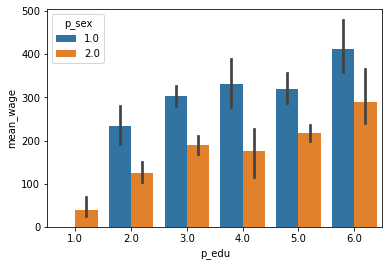

In [24]:
# 그래프 그리기: 교육에 따른 평균 임금 성별 별로 시각화 
sns.barplot(data=df4,x='p_edu',y='mean_wage',hue='p_sex')

<AxesSubplot:xlabel='p_fulltime', ylabel='mean_wage'>

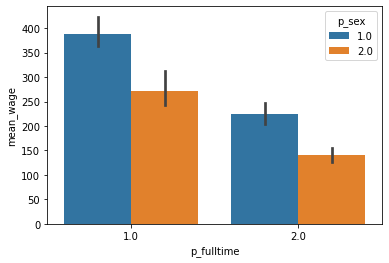

In [25]:
# 그래프 그리기: 정규직 여부에 따른 평균 임금 성별 별로 시각화 

sns.barplot(data=df4,x='p_fulltime',y='mean_wage',hue='p_sex')

<AxesSubplot:xlabel='p_region', ylabel='mean_wage'>

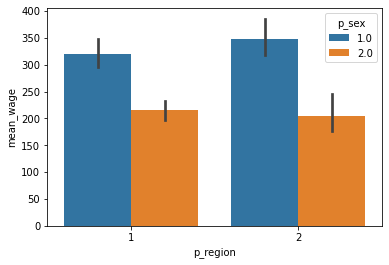

In [26]:
# 그래프 그리기: 거주 지역에 따른 평균 임금 성별 별로 시각화 

sns.barplot(data=df4,x='p_region',y='mean_wage',hue='p_sex')

<AxesSubplot:xlabel='age', ylabel='mean_wage'>

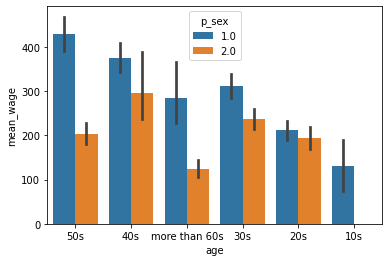

In [29]:
# 그래프 그리기: 연령대에 따른 평균 임금 성별 별로 시각화 

sns.barplot(data=df4,x='age',y='mean_wage',hue='p_sex')

<AxesSubplot:xlabel='p_economicLevel', ylabel='mean_wage'>

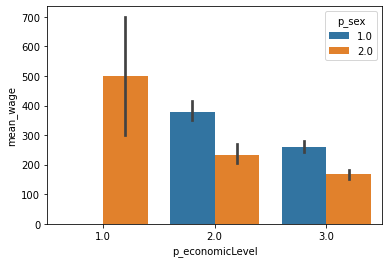

In [35]:
# 그래프 그리기: 경제적 지위에 따른 평균 임금 성별 별로 시각화 

sns.barplot(data=df4,x='p_economicLevel',y='mean_wage',hue='p_sex')

<AxesSubplot:xlabel='p_economicLevel', ylabel='mean_wage'>

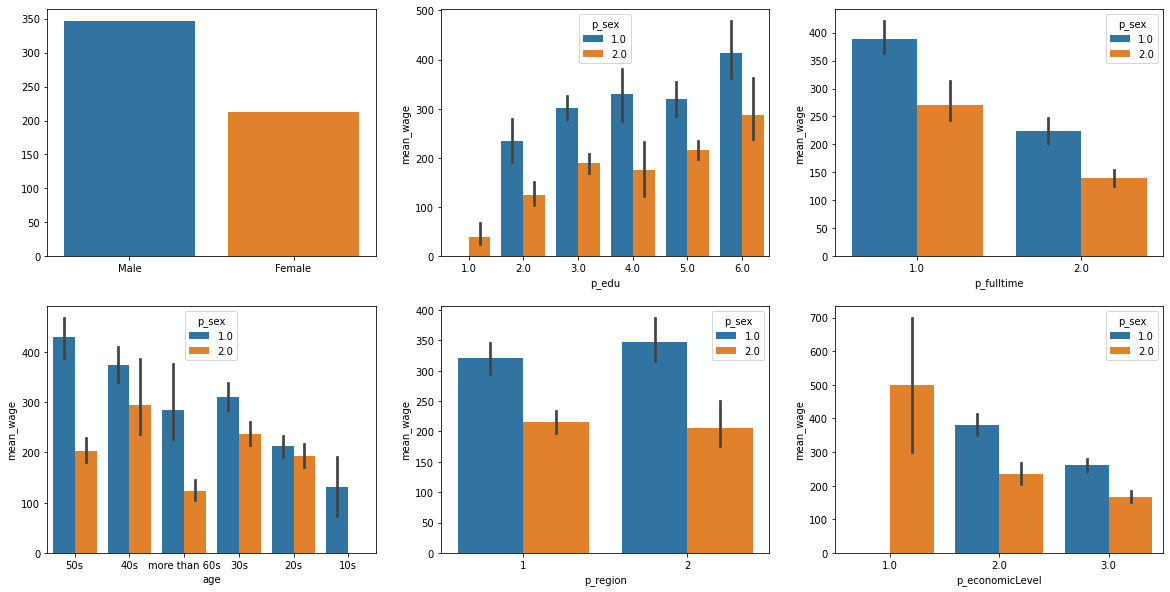

In [50]:
# 전체 그래프 시각화
fig, ax= plt.subplots(ncols=3,nrows=2, figsize=(20,10))
sns.barplot(data=sex_wage_result, x=x, y=y, ax=ax[0,0])
sns.barplot(data=df4,x='p_edu',y='mean_wage',hue='p_sex', ax=ax[0,1])
sns.barplot(data=df4,x='p_fulltime',y='mean_wage',hue='p_sex', ax=ax[0,2])
sns.barplot(data=df4,x='age',y='mean_wage',hue='p_sex', ax=ax[1,0])
sns.barplot(data=df4,x='p_region',y='mean_wage',hue='p_sex', ax=ax[1,1])
sns.barplot(data=df4,x='p_economicLevel',y='mean_wage',hue='p_sex', ax=ax[1,2])